In [ ]:
# Friday-WorkingHours-Morning.pcap_ISCX.csv


In [20]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [21]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('/home/mak/mak/maths/MNAD/datasets/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv',encoding='utf-8')
df.dtypes
# df['Destination-Port'] = df['Destination-Port'].astype(str, errors = 'raise')
dfn = df.convert_dtypes()
df.head(10)
# dfn.dtypes
print(dfn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191033 entries, 0 to 191032
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             191033 non-null  Int64  
 1    Flow Duration                191033 non-null  Int64  
 2    Total Fwd Packets            191033 non-null  Int64  
 3    Total Backward Packets       191033 non-null  Int64  
 4   Total Length of Fwd Packets   191033 non-null  Int64  
 5    Total Length of Bwd Packets  191033 non-null  Int64  
 6    Fwd Packet Length Max        191033 non-null  Int64  
 7    Fwd Packet Length Min        191033 non-null  Int64  
 8    Fwd Packet Length Mean       191033 non-null  Float64
 9    Fwd Packet Length Std        191033 non-null  Float64
 10  Bwd Packet Length Max         191033 non-null  Int64  
 11   Bwd Packet Length Min        191033 non-null  Int64  
 12   Bwd Packet Length Mean       191033 non-nul

In [22]:
dfn.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,72,72,72.0,0.0,67.411331,0.425756,2398738.085,5798697.94,16400000,3,113000000,3636796.452,6848760.823,16400000,3,113000000,7516023.2,8323384.915,16400000,3,1,0,0,0,1024,512,0.283837,0.141919,0,403,163.326531,178.931713,32016.55782,0,1,0,0,1,0,0,0,0,166.729167,201.5,72.0,1024,0,0,0,0,0,0,32,6448,16,1152,377,2079,15,32,359.428571,11.998016,380,343,16100000.0,498804.8203,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,316,316,316.0,0.0,102.039585,0.425756,2398735.319,5798709.67,16400000,2,113000000,3636792.258,6848776.836,16400000,2,113000000,7516016.133,8323376.147,16400000,4,1,0,0,0,1024,512,0.283838,0.141919,0,403,243.0,174.716914,30526.0,0,1,0,0,1,0,0,0,0,248.0625,201.5,316.0,1024,0,0,0,0,0,0,32,6448,16,5056,955,2079,15,32,320.285714,15.744992,330,285,16100000.0,498793.6656,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,4.790898,209112.8254,1395543.434,20800000,0,114000000,209112.8254,1395543.434,20800000,0,0,0.0,0.0,0,0,0,0,0,0,0,0,4.790898,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,545,0,0,0,-1,-1,0,0,9361828.6,7324645.883,18900000,19,12200000.0,6935824.002,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.0,0,0,0.0,0.0,6152.248167,219.723149,4767.904762,21833.01862,100055,1,100126,4767.904762,21833.01862,100055,1,0,0.0,0.0,0,0,0,0,0,0,704,0,219.723149,0.0,28,28,28.0,0.0,0.0,0,0,0,0,0,0,0,0,0,29.272727,28.0,0.0,704,0,0,0,0,0,0,22,616,0,0,-1,-1,21,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,73.046019,18253.33333,30469.83535,53431,108,54760,18253.33333,30469.83535,53431,108,0,0.0,0.0,0,0,0,0,0,0,0,0,73.046019,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,4,0,0,0,-1,-1,0,0,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [23]:
target = dfn[' Label']
inputs = dfn
target.sample(10)

12495     BENIGN
19317     BENIGN
77430     BENIGN
156258    BENIGN
108313    BENIGN
15098     BENIGN
66743     BENIGN
143833    BENIGN
87170     BENIGN
107681    BENIGN
Name:  Label, dtype: string

In [7]:
tag = df.groupby(' Label')[' Label'].agg('count')
tag

 Label
BENIGN    189067
Bot         1966
Name:  Label, dtype: int64

In [24]:
dfn.to_csv('all_data.csv', encoding='utf-8')

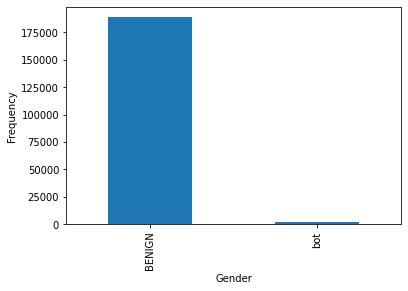

In [8]:
target.value_counts().plot(kind='bar')
plt.xticks([0,1], ['BENIGN', 'bot'])
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y=le.fit_transform(target)

print(np.average(Y))
X=dfn.iloc[:,:-1]
X.astype(np.float32,copy=False)

X.drop(X.columns[14], axis=1,inplace=True)
X.drop(X.columns[14], axis=1,inplace=True)

print(X.shape)
X.dropna()
print(X.shape,np.max(np.max(X).astype(np.float32)))
count = -1
for i in np.max(X).astype(np.float32):
    count += 1
    print(count, '---',i)

0.010291415619290908
(191033, 76)
(191033, 76) 627039488.0
0 --- 64948.0
1 --- 119999992.0
2 --- 207964.0
3 --- 284602.0
4 --- 1235152.0
5 --- 627000000.0
6 --- 24820.0
7 --- 2325.0
8 --- 5940.85693359375
9 --- 7049.46923828125
10 --- 13032.0
11 --- 1639.0
12 --- 3787.339599609375
13 --- 2773.898193359375
14 --- 119000000.0
15 --- 84800000.0
16 --- 120000000.0
17 --- 119000000.0
18 --- 120000000.0
19 --- 120000000.0
20 --- 83500000.0
21 --- 120000000.0
22 --- 120000000.0
23 --- 120000000.0
24 --- 120000000.0
25 --- 83400000.0
26 --- 120000000.0
27 --- 120000000.0
28 --- 1.0
29 --- 0.0
30 --- 0.0
31 --- 0.0
32 --- 4369484.0
33 --- 5692040.0
34 --- 3000000.0
35 --- 2000000.0
36 --- 1359.0
37 --- 24820.0
38 --- 2265.586181640625
39 --- 4708.990234375
40 --- 22200000.0
41 --- 1.0
42 --- 1.0
43 --- 1.0
44 --- 1.0
45 --- 1.0
46 --- 1.0
47 --- 0.0
48 --- 1.0
49 --- 8.0
50 --- 2328.0
51 --- 5940.85693359375
52 --- 3787.339599609375
53 --- 4369484.0
54 --- 0.0
55 --- 0.0
56 --- 0.0
57 --- 0.0
5

In [10]:
np.random.seed(0)
#x_train, x_test, y_train, y_test = train_test_split(label_puts, target, test_size = 0.99, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)
print(x_train.shape,len(y_train),x_test.shape,len(y_test))
x_train.columns

(152826, 76) 152826 (38207, 76) 38207


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean',
       ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count',

In [11]:
print('---------------------------Decision Tree CLassifier------------------')

---------------------------Decision Tree CLassifier------------------


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#print(x_train.shape,np.max(np.max(x_train)))
#x_train.dropna(with_inf=True)
print(x_train.shape, y_train.shape)
dtc = DecisionTreeClassifier(max_depth = 30)
dtc = dtc.fit(x_train,y_train)

(152826, 76) (152826,)


In [13]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,30):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(x_train, y_train)
    train_accuracy.append(dt_model.score(x_train, y_train))
    validation_accuracy.append(dt_model.score(x_test, y_test))
print(len(train_accuracy))
print(len(validation_accuracy))
frame = pd.DataFrame({'max_depth':range(1,30), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})

29
29


No handles with labels found to put in legend.


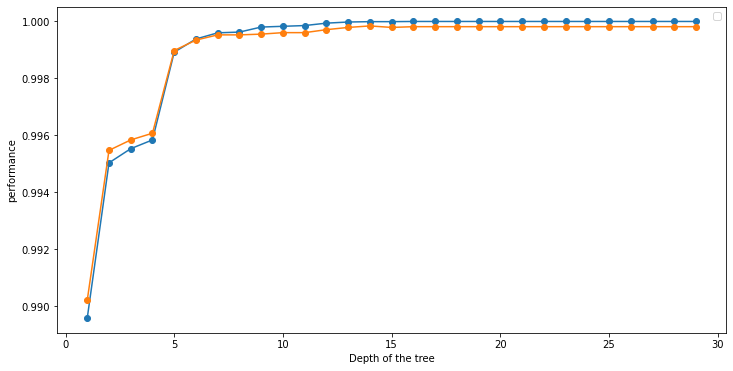

In [15]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of the tree')
plt.ylabel('performance')
plt.legend()

In [16]:
from sklearn.metrics import accuracy_score,f1_score
print(dtc.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9998167874996728
0.9998167874996728
0.9906040268456376


In [17]:
attributes = list(x_train)
sorted(zip(dtc.feature_importances_, attributes), reverse=True)

# Subflow F.Bytes 0.0239
# Total Len F.Packets 0.0158
# F.Packet Len Mean 0.0025
# B.Packets/s 0.002

[(0.4802738216616427, ' Bwd IAT Min'),
 (0.287122935117024, 'Init_Win_bytes_forward'),
 (0.07007218287130407, ' Destination Port'),
 (0.044339217144849466, ' PSH Flag Count'),
 (0.025891231508270756, ' Fwd Header Length.1'),
 (0.025199936485614877, ' Fwd Packet Length Mean'),
 (0.02338418962042191, ' Packet Length Std'),
 (0.02147820770931021, ' Init_Win_bytes_backward'),
 (0.01007782587159553, ' Flow IAT Max'),
 (0.007002580415218665, ' Bwd Packet Length Std'),
 (0.001901019470290333, ' Flow IAT Min'),
 (0.0014698962175630243, ' Flow IAT Mean'),
 (0.0012757644134243687, ' Total Length of Bwd Packets'),
 (0.0003105511858350647, 'Fwd Packets/s'),
 (0.000200640307635008, ' Flow Duration'),
 (0.0, 'Total Length of Fwd Packets'),
 (0.0, 'Subflow Fwd Packets'),
 (0.0, 'Idle Mean'),
 (0.0, 'Fwd PSH Flags'),
 (0.0, 'Fwd IAT Total'),
 (0.0, 'Fwd Avg Bytes/Bulk'),
 (0.0, 'FIN Flag Count'),
 (0.0, 'Bwd Packet Length Max'),
 (0.0, 'Bwd IAT Total'),
 (0.0, 'Bwd Avg Bulk Rate'),
 (0.0, 'Active Mean

In [18]:
print('---------------------------Random Forest CLassifier------------------')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =5)
model = model.fit(x_train, y_train)
rfy_pred = model.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(model.score(x_test,y_test))

---------------------------Random Forest CLassifier------------------
0.9991886303556939


In [19]:
attributes = list(x_train)
sorted(zip(model.feature_importances_, attributes), reverse=True)
# Subflow F.Bytes 0.0239
# Total Len F.Packets 0.0158
# F.Packet Len Mean 0.0025
# B.Packets/s 0.002

[(0.14973949067271175, ' Destination Port'),
 (0.12857230581087592, 'Init_Win_bytes_forward'),
 (0.08460066322624119, ' Bwd IAT Mean'),
 (0.07593133394329446, ' Subflow Bwd Packets'),
 (0.06861879432242451, ' Flow IAT Max'),
 (0.06415099283865326, ' Init_Win_bytes_backward'),
 (0.06209102549642252, ' Flow IAT Min'),
 (0.06126558292305132, ' Bwd IAT Min'),
 (0.04499453940259738, ' Bwd IAT Max'),
 (0.032583957098774596, ' Fwd IAT Std'),
 (0.02823415966862087, ' Total Length of Bwd Packets'),
 (0.025095695414109293, ' Total Backward Packets'),
 (0.017534745838993972, ' Bwd Packet Length Std'),
 (0.01586995769460682, ' Bwd Packets/s'),
 (0.01568179156717886, ' Packet Length Std'),
 (0.01447882999536707, ' Fwd Header Length.1'),
 (0.01270892996118624, ' Bwd Packet Length Mean'),
 (0.011894250838635451, ' Flow Duration'),
 (0.011444632166283702, ' Packet Length Variance'),
 (0.007505107956558468, ' Fwd IAT Max'),
 (0.007002706818380241, ' Avg Bwd Segment Size'),
 (0.006757606913325945, ' Flo

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)
# fit the regressor with x and y data
regressor.fit(x_train, y_train)  
attributes = list(x_train)
sorted(zip(regressor.feature_importances_, attributes), reverse=True)

[(0.5005265041008247, ' Bwd IAT Min'),
 (0.24845936062574148, 'Init_Win_bytes_forward'),
 (0.09188452387259055, ' Destination Port'),
 (0.03433951386613285, ' PSH Flag Count'),
 (0.021738747891320426, ' Init_Win_bytes_backward'),
 (0.01515772544239261, ' Fwd Header Length'),
 (0.013993824878105202, ' Flow Duration'),
 (0.01371499178479133, ' Bwd Packet Length Std'),
 (0.00911119626365784, ' Fwd Header Length.1'),
 (0.0075830653887719295, ' Packet Length Std'),
 (0.0054265186492657765, 'Fwd IAT Total'),
 (0.0043294928208921285, ' URG Flag Count'),
 (0.0042423922232039755, 'Bwd Packet Length Max'),
 (0.0035641016284499866, ' Avg Fwd Segment Size'),
 (0.0035469083999255537, ' Bwd Packets/s'),
 (0.003078703687257249, ' Subflow Bwd Bytes'),
 (0.0029037811294598806, ' Avg Bwd Segment Size'),
 (0.002790916579239566, ' Packet Length Mean'),
 (0.002413272437492204, ' Fwd Packet Length Std'),
 (0.0023685341046571083, ' Flow IAT Mean'),
 (0.002071974229772646, ' Packet Length Variance'),
 (0.0017

In [24]:
print(regressor.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9450286165759203
0.9994438155561517
0.9727651393784044
